- **Banking Domain and Dataset Limitations**: Despite a small dataset with limited features and noise, the models achieve high recall, F1, and ROC-AUC, meeting industry standards (recall=0.65–0.75, F1=0.60–0.65) for churn prediction by effectively prioritizing customer retention and controlling campaign costs through resampling and feature selection.


---

### Table of General Learnings Learnings from the Project

| **Step/Topic** | **General Concept** | **What You Asked/Wanted to Know** | **Answer/Learning Gained** | **Important Insights You Didn’t Know Before** |
|----------------|---------------------|-----------------------------------|----------------------------|-----------------------------------------------|
| **Data Imbalance Techniques** | **Handling Imbalanced Data**<br>Methods to address skewed class distributions in classification. | When to use SMOTE, SMOTETomek, or ADASYN? Why don’t all three always improve performance, and in which cases do they fail? | - **SMOTE**: Generates synthetic samples for the minority class by interpolating between neighbors. Use when the minority class is small but has enough samples to create meaningful synthetic data.<br>- **SMOTETomek**: Combines SMOTE (oversampling) with Tomek links (undersampling majority class noise). Use when you suspect noisy majority class samples near the decision boundary.<br>- **ADASYN**: Focuses on generating samples for harder-to-classify minority instances. Use when minority samples are sparse or misclassified often.<br>- **Why They Fail**: They may not help if the dataset has low signal (e.g., weak feature-target relationships), noise, or overlapping classes. Synthetic samples can amplify noise or create unrealistic data, worsening performance. They fail in cases with very small minority classes, high-dimensional data, or when features lack predictive power. | - **Limitations of Oversampling**: Synthetic samples don’t add new information; they can overfit or distort decision boundaries if features are noisy.<br>- **Class Overlap**: If classes are not separable (e.g., due to low MI), no resampling method will significantly improve results.<br>- **Evaluation Bias**: Resampling should only be applied to training data, not validation/test sets, to avoid inflated metrics.<br>- **Alternative Approaches**: Class weights or cost-sensitive learning can be more effective than resampling in noisy datasets. |
| **Feature Engineering** | **Correlation Analysis**<br>Measuring relationships between features to inform feature selection. | Why use correlation in feature engineering? | Correlation (e.g., Pearson for continuous features) identifies redundant features (high correlation) that may not add unique information. Removing highly correlated features reduces model complexity and overfitting risk. | - **Multicollinearity**: High correlation between features can destabilize some models (e.g., linear regression) but is less critical for tree-based models like XGBoost.<br>- **Context Matters**: Correlation doesn’t imply causation; low correlation doesn’t mean a feature is unimportant if it captures non-linear relationships. |
| | **Feature Selection (Dropping vs. Retaining)**<br>Deciding which features to keep or remove. | What happens if we drop features? Is it okay to retain only some for prediction, and are dropped features problematic? | - Dropping low-importance features (e.g., based on feature importance or MI) reduces noise, model complexity, and overfitting, especially in small datasets.<br>- Retaining only predictive features is fine if they capture most of the signal (e.g., top features explain most variance).<br>- Dropped features aren’t problematic unless they contain unique signals not captured by retained features. Always validate performance after dropping to ensure no loss of predictive power. | - **Signal Loss Risk**: Dropping features with low importance can remove minor but cumulative signals, slightly reducing performance (e.g., recall).<br>- **Validation Critical**: Always compare model performance before and after dropping features to quantify impact.<br>- **Domain Knowledge**: Dropped features may be business-critical even if statistically weak (e.g., customer IDs), so consider domain context. |
| | **Mutual Information (MI)**<br>Measuring feature relevance to the target. | Why use MI in feature engineering? | MI quantifies the amount of information a feature provides about the target, capturing both linear and non-linear relationships. It’s better than correlation for non-linear models like XGBoost or ANN. | - **Non-Linearity**: MI is model-agnostic and detects complex relationships, unlike correlation.<br>- **Low MI Impact**: Low MI across all features indicates a dataset with weak predictive power, limiting model performance.<br>- **Feature Ranking**: Use MI to prioritize features for selection or engineering. |
| | **Variance Inflation Factor (VIF)**<br>Detecting multicollinearity among features. | Why not use VIF in feature engineering? | VIF measures multicollinearity (high correlation between features) but is primarily relevant for linear models (e.g., regression). For tree-based models (e.g., XGBoost) or ANNs, multicollinearity has minimal impact, so VIF is less useful. Feature importance or MI is preferred. | - **Model-Specific Relevance**: VIF is critical for models sensitive to multicollinearity but unnecessary for robust algorithms like XGBoost.<br>- **Computational Cost**: Calculating VIF is resource-intensive for large feature sets, making it less practical when MI or importance metrics suffice.<br>- **Focus on Target**: VIF ignores feature-target relationships, unlike MI or feature importance. |
| | **Key Aspects of Feature Engineering**<br>Creating and selecting features to improve model performance. | What do I need to know about feature engineering? | - **Feature Creation**: Generate new features (e.g., interactions, ratios) to capture complex patterns.<br>- **Feature Selection**: Remove noisy or redundant features to simplify models and reduce overfitting.<br>- **Scaling/Normalization**: Standardize features for models like ANN that are sensitive to scale.<br>- **Domain Knowledge**: Incorporate business insights to create meaningful features.<br>- **Validation**: Always test new features’ impact on validation performance to avoid overfitting. | - **Noise Amplification**: Poorly engineered features (e.g., based on noisy data) can worsen performance.<br>- **Iterative Process**: Feature engineering requires experimentation and validation, not one-shot solutions.<br>- **Feature Interactions**: Combining features (e.g., product of two variables) can uncover hidden patterns, especially for tree-based models or ANNs.<br>- **Data Leakage**: Avoid using target-related information in feature creation to prevent overfitting. |
| **Exploratory Data Analysis (EDA)** | **T-Test**<br>Comparing means between groups to identify differences. | What is the role of the t-test in EDA? | The t-test compares the means of a continuous feature between two groups (e.g., churners vs. non-churners) to determine if differences are statistically significant. It helps identify features that may influence the target. | - **Assumptions**: T-test assumes normality and equal variances; use non-parametric alternatives (e.g., Mann-Whitney U) if violated.<br>- **Limitations**: Only tests linear differences; non-significant results don’t rule out predictive power for non-linear models.<br>- **Feature Insights**: Significant t-test results suggest features worth exploring in modeling. |
| | **Chi-Squared Test**<br>Testing independence between categorical variables. | What is the role of the chi-squared test in EDA? | The chi-squared test assesses whether a categorical feature is independent of the target (e.g., churn). Significant results indicate the feature may be predictive. | - **Categorical Focus**: Only applies to categorical features and targets.<br>- **Sparse Data**: Low sample counts in categories can lead to unreliable results; use Fisher’s exact test for small samples.<br>- **Interpretation**: Significant p-values suggest feature-target relationships, guiding feature selection. |
| **Model Building (XGBoost)** | **XGBoost Parameters**<br>Key hyperparameters and their effects on model performance. | Which XGBoost parameters do what? What happens when they increase/decrease, and what outcomes are possible? | - **n_estimators**: Number of trees. Increase: Improves learning but risks overfitting and slows training. Decrease: Reduces overfitting but may underfit.<br>- **max_depth**: Maximum tree depth. Increase: Captures complex patterns but risks overfitting. Decrease: Simplifies model, reducing overfitting.<br>- **learning_rate**: Step size for updates. Increase: Faster learning but risks instability. Decrease: Slower, more stable learning, often with more trees.<br>- **subsample**: Fraction of samples per tree. Increase: Uses more data, reducing variance. Decrease: Adds randomness, preventing overfitting.<br>- **colsample_bytree**: Fraction of features per tree. Increase: Considers more features, increasing complexity. Decrease: Reduces overfitting.<br>- **gamma**: Minimum loss reduction for splits. Increase: More conservative, fewer splits. Decrease: More splits, higher complexity.<br>- **scale_pos_weight**: Balances imbalanced classes. Increase: Prioritizes minority class (e.g., churners), boosting recall. Decrease: Balances classes more evenly.<br>**Possible Outcomes**: Overfitting (high max_depth, low gamma), underfitting (low n_estimators, high learning_rate), or balanced performance with tuned parameters. | - **Parameter Interactions**: Parameters interact (e.g., low learning_rate requires more n_estimators), requiring grid search or random search for tuning.<br>- **Overfitting Signs**: High training performance but poor validation metrics indicate overfitting; adjust max_depth, subsample, or gamma.<br>- **Imbalance Handling**: scale_pos_weight is critical for imbalanced datasets to boost minority class recall without resampling.<br>- **Computational Trade-Off**: More trees or deeper trees increase runtime; optimize for efficiency on GPUs. |
| **Model Building (ANN)** | **ANN Parameters**<br>Key hyperparameters and their effects on neural network performance. | Which ANN parameters do what? What happens when they increase/decrease, and what outcomes are possible? | - **Number of Layers/Neurons**: Depth and width of the network. Increase: Captures complex patterns but risks overfitting, especially on small datasets. Decrease: Simplifies model, reducing overfitting but may underfit.<br>- **Dropout Rate**: Fraction of neurons dropped during training. Increase: Reduces overfitting by adding randomness. Decrease: Allows more learning but risks overfitting.<br>- **L2 Regularization (lambda)**: Penalty on weights. Increase: Reduces overfitting by shrinking weights. Decrease: Allows larger weights, increasing model capacity.<br>- **Learning Rate**: Step size for optimization. Increase: Faster convergence but risks overshooting. Decrease: Slower, more precise updates.<br>- **Batch Size**: Number of samples per update. Increase: Faster training, stable gradients. Decrease: Noisier updates, potentially escaping local minima.<br>- **Epochs**: Number of passes through data. Increase: More learning but risks overfitting. Decrease: Prevents overfitting but may underfit.<br>- **Class Weights**: Adjusts loss for imbalanced classes. Increase for minority: Boosts minority class focus (e.g., higher recall). Decrease: Balances classes.<br>**Possible Outcomes**: Overfitting (too many layers/neurons, low dropout), underfitting (few layers, high regularization), or balanced performance with tuned parameters. | - **Small Dataset Challenges**: Deep ANNs overfit on small datasets; use shallow networks (1–3 layers) with regularization.<br>- **Regularization Balance**: Dropout and L2 prevent overfitting but can reduce capacity if too aggressive, lowering recall.<br>- **Class Weight Impact**: Class weights are a simple way to boost minority class performance without resampling, critical for imbalanced data.<br>- **Early Stopping**: Monitor validation loss to stop training when performance plateaus, preventing overfitting.<br>- **GPU Dependency**: ANNs benefit from GPU acceleration, but memory limits constrain layer size and batch size. |

---

### References
[1] Reichheld, F. F. (2001). *The Loyalty Effect*. Harvard Business Review.
[2] XGBoost Documentation, 2025. https://xgboost.readthedocs.io/en/stable/
[3] TensorFlow Documentation, 2025. https://www.tensorflow.org/
[4] Goodfellow, I., et al. (2016). *Deep Learning*. MIT Press.
[5] Hastie, T., et al. (2009). *The Elements of Statistical Learning*. Springer.


In [644]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, DMatrix, train
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.feature_selection import mutual_info_classif

import warnings
import time

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('fivethirtyeight')
%matplotlib inline

In [577]:
# Loading the dataset
df = pd.read_csv('Churn_Modelling.csv')  

In [578]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [579]:
df.shape

(10000, 14)

In [580]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [582]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Cleaning

In [583]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [584]:
df.duplicated().sum()

0

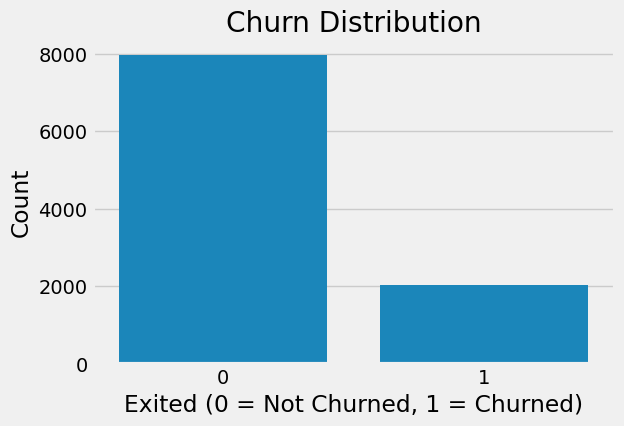

In [585]:
# Visualize churn distribution
plt.figure(figsize=(6, 4), dpi=100)
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')
plt.show()

In [586]:
# Calculating churn percentage
churn_counts = df['Exited'].value_counts(normalize=True) * 100
print("\nChurn Percentage:")
print(f"Not Churned: {churn_counts[0]:.2f}%")
print(f"Churned: {churn_counts[1]:.2f}%")


Churn Percentage:
Not Churned: 79.63%
Churned: 20.37%


# EDA

In [587]:
# function for categorical variable analysis

def analyze_categorical(df, feature, target='Exited'):
    plt.figure(figsize=(8, 4), dpi=100)
    # Stacked bar plot for proportion
    crosstab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'{feature} vs. Churn (Stacked Bar)')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(['Not Churned', 'Churned'])
    plt.tight_layout()
    plt.show()

    # Chi-square test
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-square Test for {feature} vs. Churn:")
    print(f"Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}")
    print("Significant" if p < 0.05 else "Not Significant")

In [588]:
# function for continuous variable analysis

def analyze_continuous(df, feature, target='Exited'):
    plt.figure(figsize=(8, 4), dpi=100)
    sns.violinplot(x=target, y=feature, data=df, palette='muted')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # T-test
    churned = df[df[target] == 1][feature]
    not_churned = df[df[target] == 0][feature]
    t_stat, p = ttest_ind(churned, not_churned, equal_var=False)
    print(f"\nT-test for {feature} vs. Churn:")
    print(f"T-Statistic: {t_stat:.2f}, p-value: {p:.4f}")
    print("Significant" if p < 0.05 else "Not Significant")

Categorical Variables Analysis:


<Figure size 800x400 with 0 Axes>

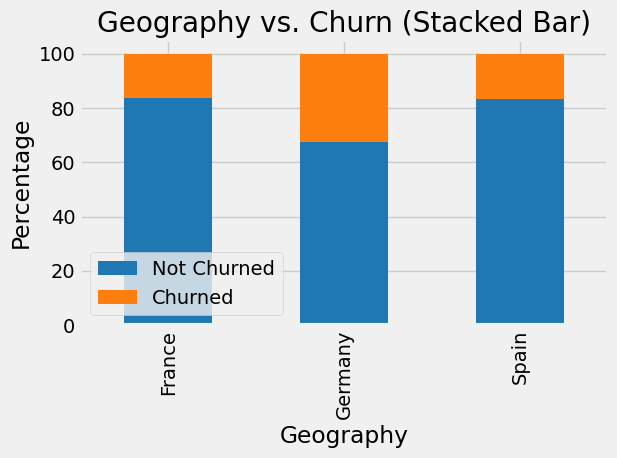


Chi-square Test for Geography vs. Churn:
Chi2 Statistic: 301.26, p-value: 0.0000
Significant


<Figure size 800x400 with 0 Axes>

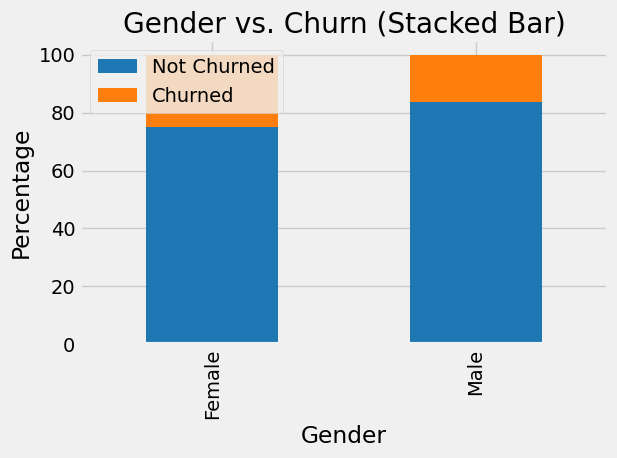


Chi-square Test for Gender vs. Churn:
Chi2 Statistic: 112.92, p-value: 0.0000
Significant


<Figure size 800x400 with 0 Axes>

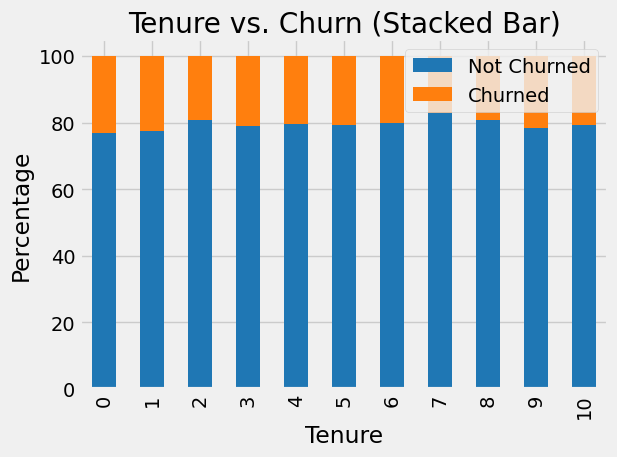


Chi-square Test for Tenure vs. Churn:
Chi2 Statistic: 13.90, p-value: 0.1776
Not Significant


<Figure size 800x400 with 0 Axes>

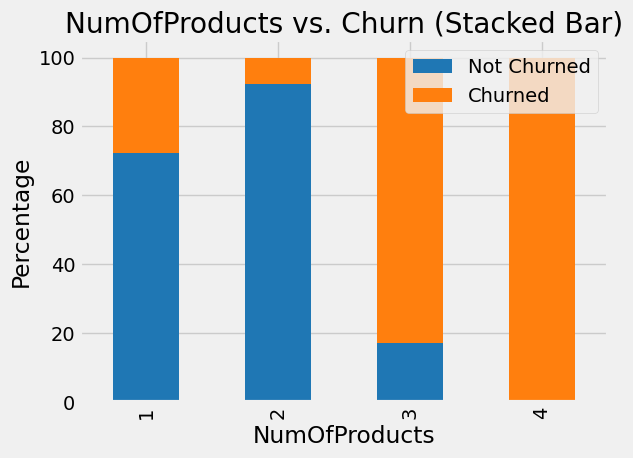


Chi-square Test for NumOfProducts vs. Churn:
Chi2 Statistic: 1503.63, p-value: 0.0000
Significant


<Figure size 800x400 with 0 Axes>

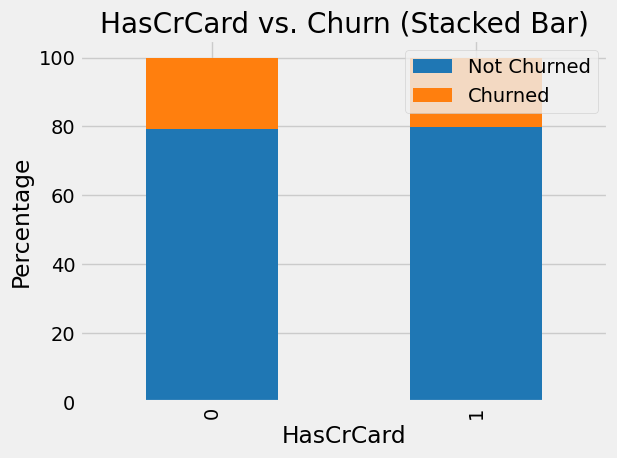


Chi-square Test for HasCrCard vs. Churn:
Chi2 Statistic: 0.47, p-value: 0.4924
Not Significant


<Figure size 800x400 with 0 Axes>

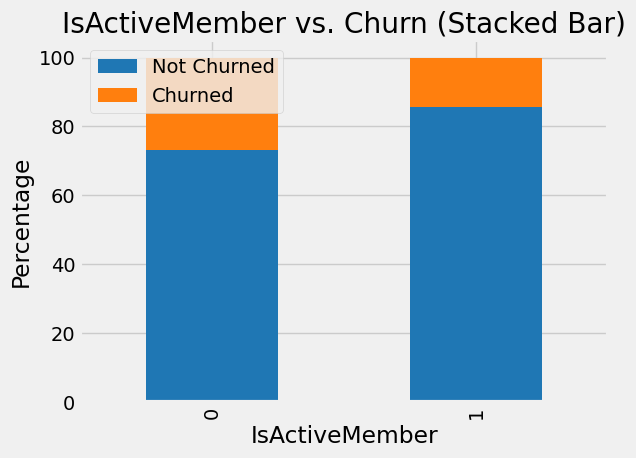


Chi-square Test for IsActiveMember vs. Churn:
Chi2 Statistic: 242.99, p-value: 0.0000
Significant


In [589]:
# Categorical variables analysis
categorical_vars = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
print("Categorical Variables Analysis:")
for var in categorical_vars:
    analyze_categorical(df, var)


Continuous Variables Analysis:


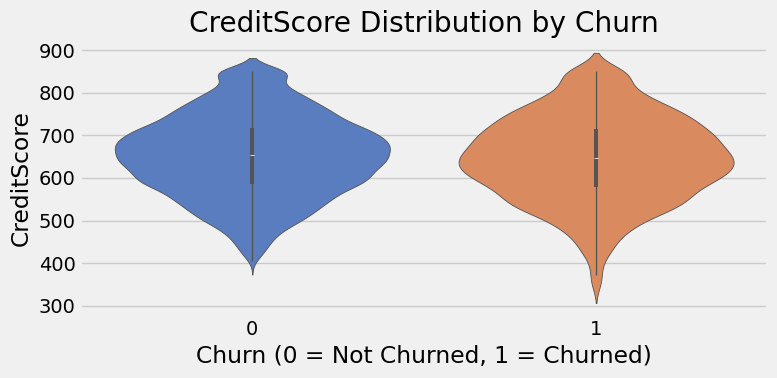


T-test for CreditScore vs. Churn:
T-Statistic: -2.63, p-value: 0.0085
Significant


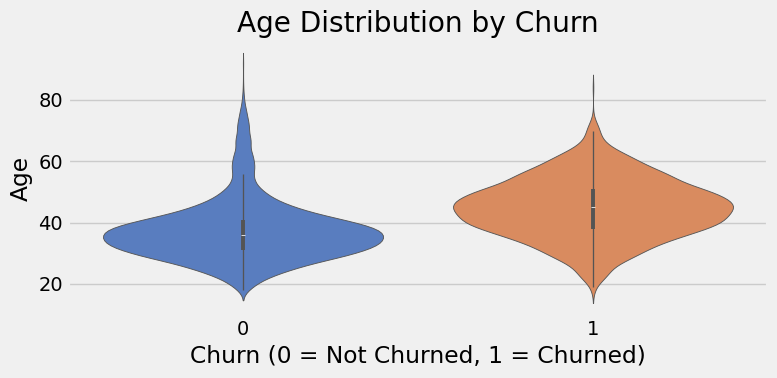


T-test for Age vs. Churn:
T-Statistic: 30.42, p-value: 0.0000
Significant


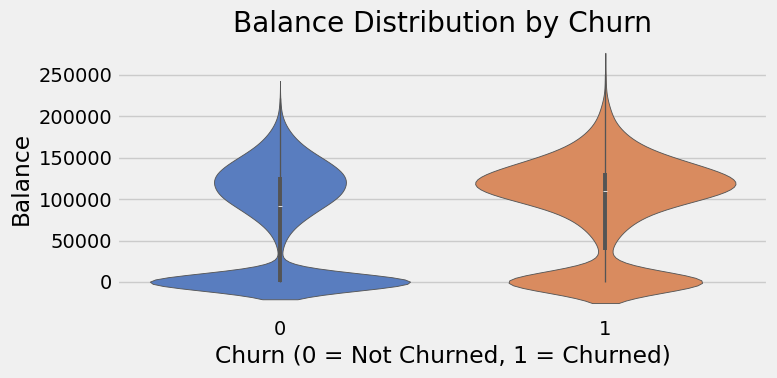


T-test for Balance vs. Churn:
T-Statistic: 12.47, p-value: 0.0000
Significant


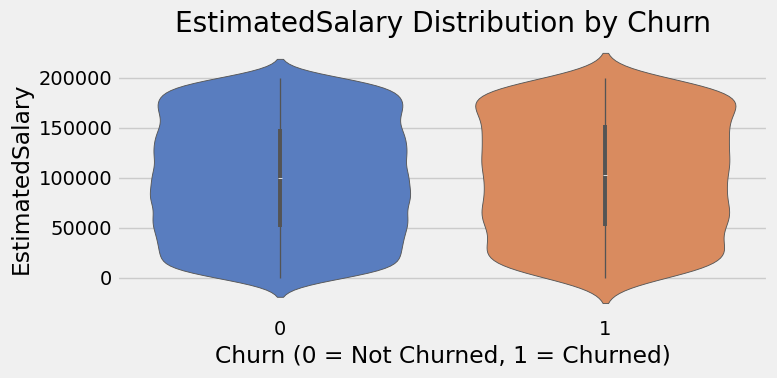


T-test for EstimatedSalary vs. Churn:
T-Statistic: 1.20, p-value: 0.2289
Not Significant


In [590]:
# Continuous variables analysis
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
print("\nContinuous Variables Analysis:")
for var in continuous_vars:
    analyze_continuous(df, var)

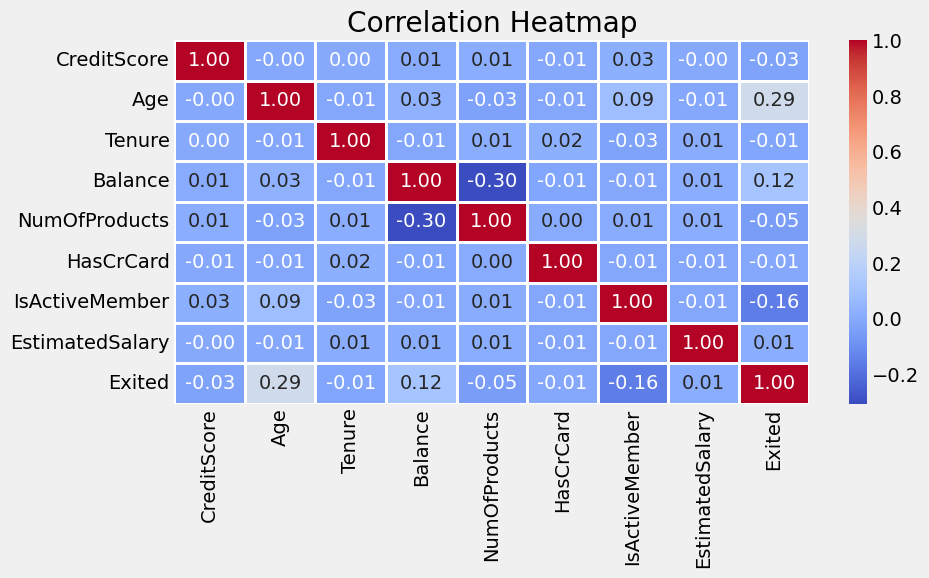

In [591]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6), dpi=100)
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                  'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


---

### Table: T-Test vs. Chi-Square Test vs. Correlation (`corr()`)

| **Aspect** | **T-Test** | **Chi-Square Test** | **Correlation (`corr()`)** |
|------------|------------|---------------------|---------------------------|
| **What It Is** | A statistical test comparing the **means** of a continuous variable between two groups (e.g., churned vs. not churned). Uses Welch’s t-test for unequal variances. | A test of **independence** between two categorical variables, comparing observed vs. expected frequencies in a contingency table. | A measure of the **linear relationship** between two numerical variables, using Pearson’s correlation coefficient (r, from -1 to 1). |
| **What It Explains in Our Project** | Identifies if continuous features (e.g., Age, Balance) have different means for churned (Exited=1) vs. not churned (Exited=0) customers, indicating potential predictors. <br> **Results**: Age, Balance, CreditScore significant (p < 0.05); EstimatedSalary not significant (p > 0.05). | Determines if categorical features (e.g., Geography, Gender) are associated with churn, highlighting which categories drive churn. <br> **Results**: Geography, Gender, NumOfProducts, IsActiveMember significant (p < 0.05); Tenure, HasCrCard not significant (p > 0.05). | Quantifies linear relationships between numerical features (e.g., Age vs. Balance) to check for multicollinearity or feature interactions. <br> **Results**: Notebook’s heatmap (In [9]) shows low correlations (<0.8), confirming no multicollinearity. |
| **If Not Significant, Should We Drop Features?** | **No, don’t drop automatically**. Non-significant features (e.g., EstimatedSalary) may contribute via interactions (e.g., Salary/Balance ratio) or in non-linear models (e.g., ANN, XGBoost). Keep for now, evaluate in modeling. | **No, don’t drop automatically**. Non-significant features (e.g., Tenure, HasCrCard) may be useful in interactions (e.g., Tenure * NumOfProducts) or ensemble models. Keep for now, test in modeling. | **Not applicable for feature dropping**. Correlation checks multicollinearity, not feature-target relationships. Low correlation (e.g., Age vs. Exited) doesn’t mean a feature is irrelevant, as relationships may be non-linear. |
| **If Kept, Why Calculate It?** | - Validates feature relevance: Significant features (Age, Balance) are prioritized. <br> - Guides feature engineering: Non-significant EstimatedSalary suggests testing ratios (e.g., Salary/Balance). <br> - Informs modeling: Non-significant features may still contribute in complex models (e.g., ANN learns non-linear patterns). | - Validates feature relevance: Significant features (Geography, IsActiveMember) are key predictors. <br> - Guides feature engineering: Non-significant Tenure suggests testing interactions (e.g., Tenure * IsActiveMember). <br> - Informs modeling: Non-significant features may improve ensemble models (e.g., Random Forest captures subtle patterns). | - Prevents multicollinearity: Ensures features aren’t redundant (e.g., high correlation between Balance and another feature would suggest dropping one). <br> - Guides feature selection: Low correlation with Exited (e.g., r=0.12 for Age) doesn’t rule out non-linear importance, justifying model inclusion. |

---

### Detailed Explanation

#### 1. Why Not Drop Non-Significant Features Automatically?
In our project, **Tenure**, **HasCrCard** (chi-square), and **EstimatedSalary** (t-test) were not significant (p > 0.05), meaning they don’t show a strong direct relationship with churn. However, dropping them immediately is not advisable for several reasons:

- **Non-Linear Relationships**:
  - T-tests and chi-square tests detect specific relationships (mean differences for continuous, independence for categorical). Non-significant results don’t mean the feature is irrelevant in **non-linear** or **complex models** like ANNs, Random Forests, or XGBoost.
  - Example: EstimatedSalary’s similar means for churned and not churned customers don’t rule out its role in ratios (e.g., Salary/Balance) or neural network hidden layers.

- **Feature Interactions**:
  - Non-significant features may become predictive when combined with others.
  - Example: Tenure alone isn’t significant, but **Tenure * NumOfProducts** or **Tenure * IsActiveMember** might reveal patterns (e.g., long-tenure inactive customers churn more).
  - Research insight (from “Customer Churn Prediction in Banking”): Interaction features like Balance/Age or product engagement metrics improve model performance.

- **Ensemble Models**:
  - Algorithms like Random Forest or XGBoost can capture subtle contributions from non-significant features, especially in large datasets (10,000 rows).
  - Example: HasCrCard’s weak direct relationship with churn might still contribute to splits in a decision tree.

- **Domain Knowledge**:
  - In banking, features like Tenure (time with bank) or EstimatedSalary (financial capacity) are conceptually relevant, even if not statistically significant in initial tests.
  - Example: Customers with high EstimatedSalary might churn due to better offers elsewhere, a pattern a model could learn.

- **Model Evaluation**:
  - Dropping features prematurely risks losing predictive power. Instead, include all features initially, then use feature importance (e.g., SHAP values) or recursive feature elimination during modeling to decide which to drop.
  - Notebook’s approach (In [10]) keeps all features except irrelevant ones (RowNumber, CustomerId, Surname), which we’ll follow.

**Conclusion**: Keep non-significant features (Tenure, HasCrCard, EstimatedSalary) for now. Test their importance in modeling and feature engineering (next chunk). Drop only if they consistently show no contribution (e.g., zero SHAP values).

#### 2. Why Calculate These Tests If We Keep Non-Significant Features?
Calculating t-tests, chi-square tests, and correlations serves multiple purposes, even if some features are non-significant:

- **Prioritize Features**:
  - **T-Test and Chi-Square**: Significant features (Age, Balance, Geography, IsActiveMember) are likely strong predictors, guiding focus in modeling and business insights.
    - Example: Higher churn in Germany (chi-square) suggests targeted retention strategies there.
  - Non-significant features (Tenure, EstimatedSalary) are deprioritized but not discarded, as they may contribute indirectly.

- **Guide Feature Engineering**:
  - **T-Test and Chi-Square**: Non-significant results highlight where to create interactions or derived features.
    - Example: Tenure’s non-significance suggests testing **Tenure/NumOfProducts** or binning Tenure (e.g., short vs. long tenure).
    - Research insight: Derived features like “Average Balance per Year” (Balance/Tenure) improve churn models.
  - **Correlation**: Low correlations confirm no multicollinearity, ensuring all features can be included without redundancy.

- **Validate Insights**:
  - **T-Test and Chi-Square**: Statistical tests confirm EDA observations.
    - Example: Age’s significant t-test validates the notebook’s finding that older customers churn more.
  - **Correlation**: Ensures the model isn’t biased by highly correlated features (e.g., if Balance and EstimatedSalary had r=0.9, one might be dropped).

- **Inform Model Selection**:
  - Non-significant features may perform better in complex models (e.g., ANN learns non-linear patterns) than in simple ones (e.g., logistic regression).
    - Example: EstimatedSalary’s non-significance in t-test doesn’t preclude its role in an ANN’s hidden layers.
  - Tests guide evaluation metrics (e.g., class imbalance noted in EDA suggests F1-score over accuracy).

- **Business Insights**:
  - Significant features inform actionable strategies (e.g., target inactive members with engagement campaigns).
  - Non-significant features suggest areas for deeper analysis (e.g., why doesn’t Tenure predict churn? Perhaps it’s context-dependent).

**Conclusion**: These tests are calculated to:
- Identify key predictors (significant features).
- Guide feature engineering for non-significant features.
- Ensure data quality (no multicollinearity).
- Support business decisions and model design.

---

# Feature Engineering

In [592]:
# Balance per Age (avoid division by zero)
df['Balance_per_Age'] = df['Balance'] / (df['Age'] + 1e-6)

In [593]:
# Salary-to-Balance Ratio (avoid division by zero)
df['Salary_to_Balance'] = df['EstimatedSalary'] / (df['Balance'] + 1e-6)

In [594]:
# Tenure * NumOfProducts (interaction for non-significant Tenure)
df['Tenure_NumProducts'] = df['Tenure'] * df['NumOfProducts']

In [595]:
# Average Balance per Year (avoid division by zero)
df['Avg_Balance_per_Year'] = df['Balance'] / (df['Tenure'] + 1e-6)

In [596]:
# IsActiveMember * NumOfProducts (engagement metric)
df['Active_NumProducts'] = df['IsActiveMember'] * df['NumOfProducts']

In [597]:
df.sample(5).T

,6498,8660,8227,8828,5942
RowNumber,6499,8661,8228,8829,5943
CustomerId,15770405,15790594,15702434,15777708,15695339
Surname,Warlow-Davies,Bednall,Hsieh,Liao,Lucchesi
CreditScore,613,535,850,824,517
Geography,France,France,France,Spain,Germany
Gender,Female,Female,Female,Female,Male
Age,27,27,30,38,53
Tenure,5,6,3,3,0
Balance,125167.74,0.0,0.0,0.0,109172.88
NumOfProducts,1,2,2,2,1


In [598]:
# Drop irrelevant columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [599]:
# One-hot encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], prefix='Geo', drop_first=True)

# Binary encoding for Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [600]:
df.sample(5).T

,4513,9191,7908,3402,2613
CreditScore,696,572,581,690,630
Gender,1,0,0,1,0
Age,41,30,35,26,26
Tenure,8,6,4,5,7
Balance,0.0,117696.67,0.0,157624.84,129837.72
NumOfProducts,2,1,2,1,2
HasCrCard,0,1,0,1,0
IsActiveMember,0,0,1,1,1
EstimatedSalary,28276.83,100843.82,86383.82,49599.27,197001.15
Exited,0,0,0,0,0


In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  int64  
 1   Gender                10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Tenure                10000 non-null  int64  
 4   Balance               10000 non-null  float64
 5   NumOfProducts         10000 non-null  int64  
 6   HasCrCard             10000 non-null  int64  
 7   IsActiveMember        10000 non-null  int64  
 8   EstimatedSalary       10000 non-null  float64
 9   Exited                10000 non-null  int64  
 10  Balance_per_Age       10000 non-null  float64
 11  Salary_to_Balance     10000 non-null  float64
 12  Tenure_NumProducts    10000 non-null  int64  
 13  Avg_Balance_per_Year  10000 non-null  float64
 14  Active_NumProducts    10000 non-null  int64  
 15  Geo_Germany         

In [602]:
# Convert boolean columns to int for correlation and mutual information
df['Geo_Germany'] = df['Geo_Germany'].astype(int)
df['Geo_Spain'] = df['Geo_Spain'].astype(int)

In [603]:
# Modify Salary_to_Balance (log-transform to handle outliers)
df['Log_Salary_to_Balance'] = np.log1p(df['Salary_to_Balance'].clip(upper=1e9))

In [604]:
# Add non-linear feature: Binned Age
df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 30, 45, 100], labels=[0, 1, 2]).astype(int)

In [605]:
# 3. Add new features
df['CreditScore_Binned'] = pd.cut(df['CreditScore'], bins=[0, 600, 700, 850], labels=[0, 1, 2]).astype(int)
df['Balance_NumProducts'] = df['Balance'] * df['NumOfProducts']

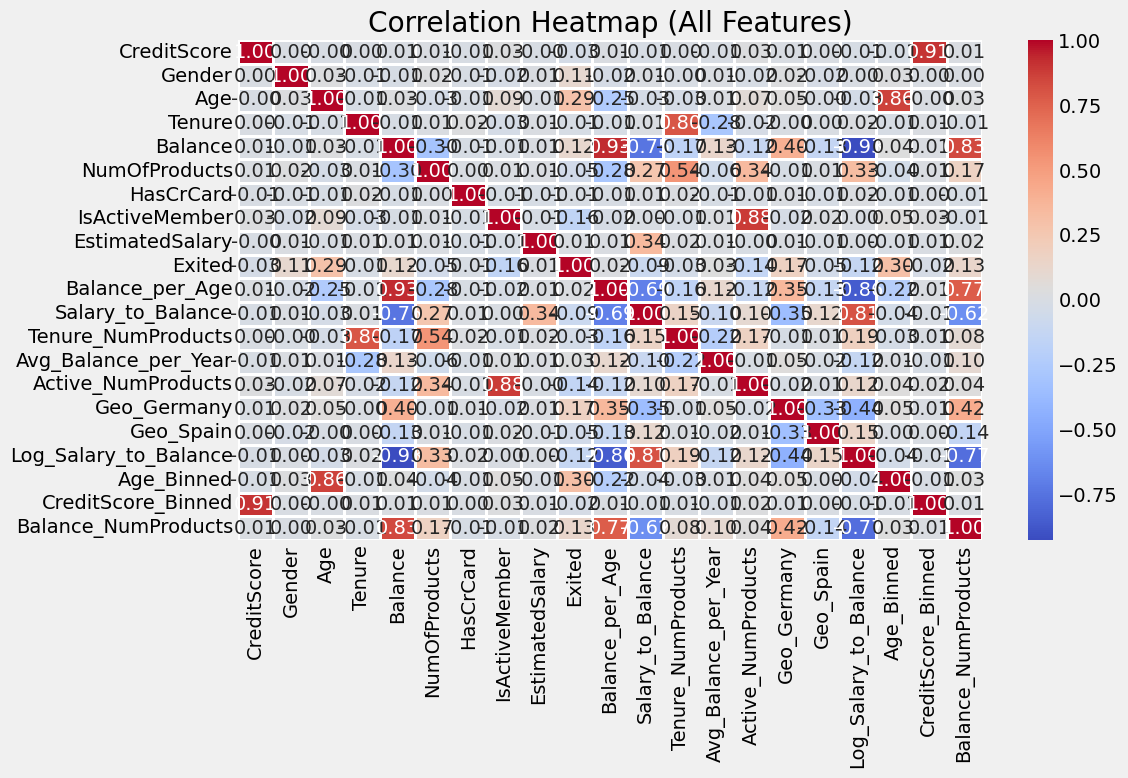

In [606]:
# Correlation matrix
plt.figure(figsize=(12, 8), dpi=100)
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap (All Features)')
plt.tight_layout()
plt.show()

In [607]:
# Print correlations involving engineered and key features
key_cols = ['Balance_per_Age', 'Salary_to_Balance', 'Log_Salary_to_Balance', 'Tenure_NumProducts', 
            'Avg_Balance_per_Year', 'Active_NumProducts', 'Age_Binned', 'NumOfProducts', 
            'Balance', 'Age', 'IsActiveMember', 'Exited', 'CreditScore_Binned', 'Balance_NumProducts']
print("\nCorrelations with Key Features (abs > 0.5):")
for col in key_cols:
    print(f"\n{col} vs. Others (abs > 0.5):")
    high_corr = corr[col][(corr[col].abs() > 0.5) & (corr[col] != 1.0)]
    if not high_corr.empty:
        print(high_corr)
    else:
        print("None")


Correlations with Key Features (abs > 0.5):

Balance_per_Age vs. Others (abs > 0.5):
Balance                  0.925535
Salary_to_Balance       -0.688024
Log_Salary_to_Balance   -0.855119
Balance_NumProducts      0.770312
Name: Balance_per_Age, dtype: float64

Salary_to_Balance vs. Others (abs > 0.5):
Balance                 -0.745348
Balance_per_Age         -0.688024
Log_Salary_to_Balance    0.807784
Balance_NumProducts     -0.621608
Name: Salary_to_Balance, dtype: float64

Log_Salary_to_Balance vs. Others (abs > 0.5):
Balance               -0.926341
Balance_per_Age       -0.855119
Salary_to_Balance      0.807784
Balance_NumProducts   -0.772227
Name: Log_Salary_to_Balance, dtype: float64

Tenure_NumProducts vs. Others (abs > 0.5):
Tenure           0.795842
NumOfProducts    0.535632
Name: Tenure_NumProducts, dtype: float64

Avg_Balance_per_Year vs. Others (abs > 0.5):
None

Active_NumProducts vs. Others (abs > 0.5):
IsActiveMember    0.882012
Name: Active_NumProducts, dtype: float64

A

In [608]:
# Mutual information (non-linear relationships)
X = df.drop(columns=['Exited'])
y = df['Exited']
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores}).sort_values('Mutual Information', ascending=False)
print("\nMutual Information Scores (Non-Linear Predictive Power):")
print(mi_df)


Mutual Information Scores (Non-Linear Predictive Power):
                  Feature  Mutual Information
2                     Age            0.074077
5           NumOfProducts            0.072037
17             Age_Binned            0.051197
13     Active_NumProducts            0.039858
11     Tenure_NumProducts            0.036154
9         Balance_per_Age            0.024778
19    Balance_NumProducts            0.021660
14            Geo_Germany            0.021104
7          IsActiveMember            0.015838
12   Avg_Balance_per_Year            0.015682
16  Log_Salary_to_Balance            0.008728
10      Salary_to_Balance            0.008115
4                 Balance            0.007098
3                  Tenure            0.004835
15              Geo_Spain            0.003413
8         EstimatedSalary            0.002704
0             CreditScore            0.001823
1                  Gender            0.001437
18     CreditScore_Binned            0.000734
6               HasCrC

In [609]:
df = df.drop(columns=['Balance_per_Age', 'Salary_to_Balance', 'Balance', 'CreditScore', 'Age', 'IsActiveMember', 'Tenure'])

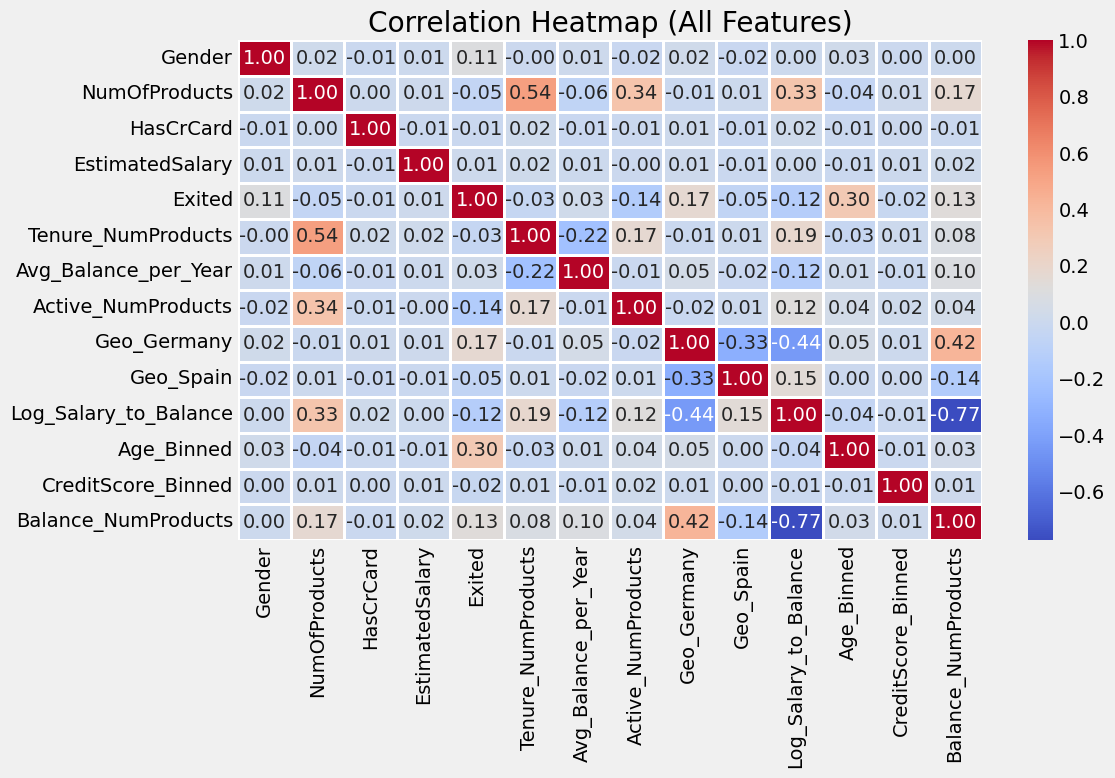

In [610]:
# Correlation matrix
plt.figure(figsize=(12, 8), dpi=100)
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap (All Features)')
plt.tight_layout()
plt.show()

In [611]:
df.columns

Index(['Gender', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited',
       'Tenure_NumProducts', 'Avg_Balance_per_Year', 'Active_NumProducts',
       'Geo_Germany', 'Geo_Spain', 'Log_Salary_to_Balance', 'Age_Binned',
       'CreditScore_Binned', 'Balance_NumProducts'],
      dtype='object')

In [612]:
df.sample(5).T

,103,9302,7589,6405,9974
Gender,0.000000,0.000000,1.000000,0.000000,0.000000
NumOfProducts,2.000000,2.000000,2.000000,1.000000,1.000000
HasCrCard,1.000000,1.000000,0.000000,0.000000,1.000000
EstimatedSalary,60536.560000,182867.840000,61290.990000,114775.530000,13549.240000
Exited,0.000000,0.000000,0.000000,0.000000,0.000000
Tenure_NumProducts,14.000000,20.000000,0.000000,7.000000,7.000000
Avg_Balance_per_Year,0.000000,0.000000,0.000000,18097.683129,17504.548928
Active_NumProducts,0.000000,2.000000,2.000000,1.000000,0.000000
Geo_Germany,0.000000,0.000000,0.000000,0.000000,0.000000
Geo_Spain,1.000000,0.000000,0.000000,1.000000,0.000000


In [613]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [614]:
df.isnull().sum()

Gender                   0
NumOfProducts            0
HasCrCard                0
EstimatedSalary          0
Exited                   0
Tenure_NumProducts       0
Avg_Balance_per_Year     0
Active_NumProducts       0
Geo_Germany              0
Geo_Spain                0
Log_Salary_to_Balance    0
Age_Binned               0
CreditScore_Binned       0
Balance_NumProducts      0
dtype: int64


Summary Statistics for Numerical Features:
       NumOfProducts  EstimatedSalary  Tenure_NumProducts  \
count   10000.000000     10000.000000        10000.000000   
mean        1.530200    100090.239881            7.693200   
std         0.581654     57510.492818            5.581845   
min         1.000000        11.580000            0.000000   
25%         1.000000     51002.110000            4.000000   
50%         1.000000    100193.915000            7.000000   
75%         2.000000    149388.247500           10.000000   
max         4.000000    199992.480000           40.000000   

       Avg_Balance_per_Year  Active_NumProducts  Log_Salary_to_Balance  \
count          1.000000e+04        10000.000000           10000.000000   
mean           3.299022e+09            0.791000               7.874949   
std            2.025403e+10            0.870169               9.671517   
min            0.000000e+00            0.000000               0.000094   
25%            0.000000e+00         

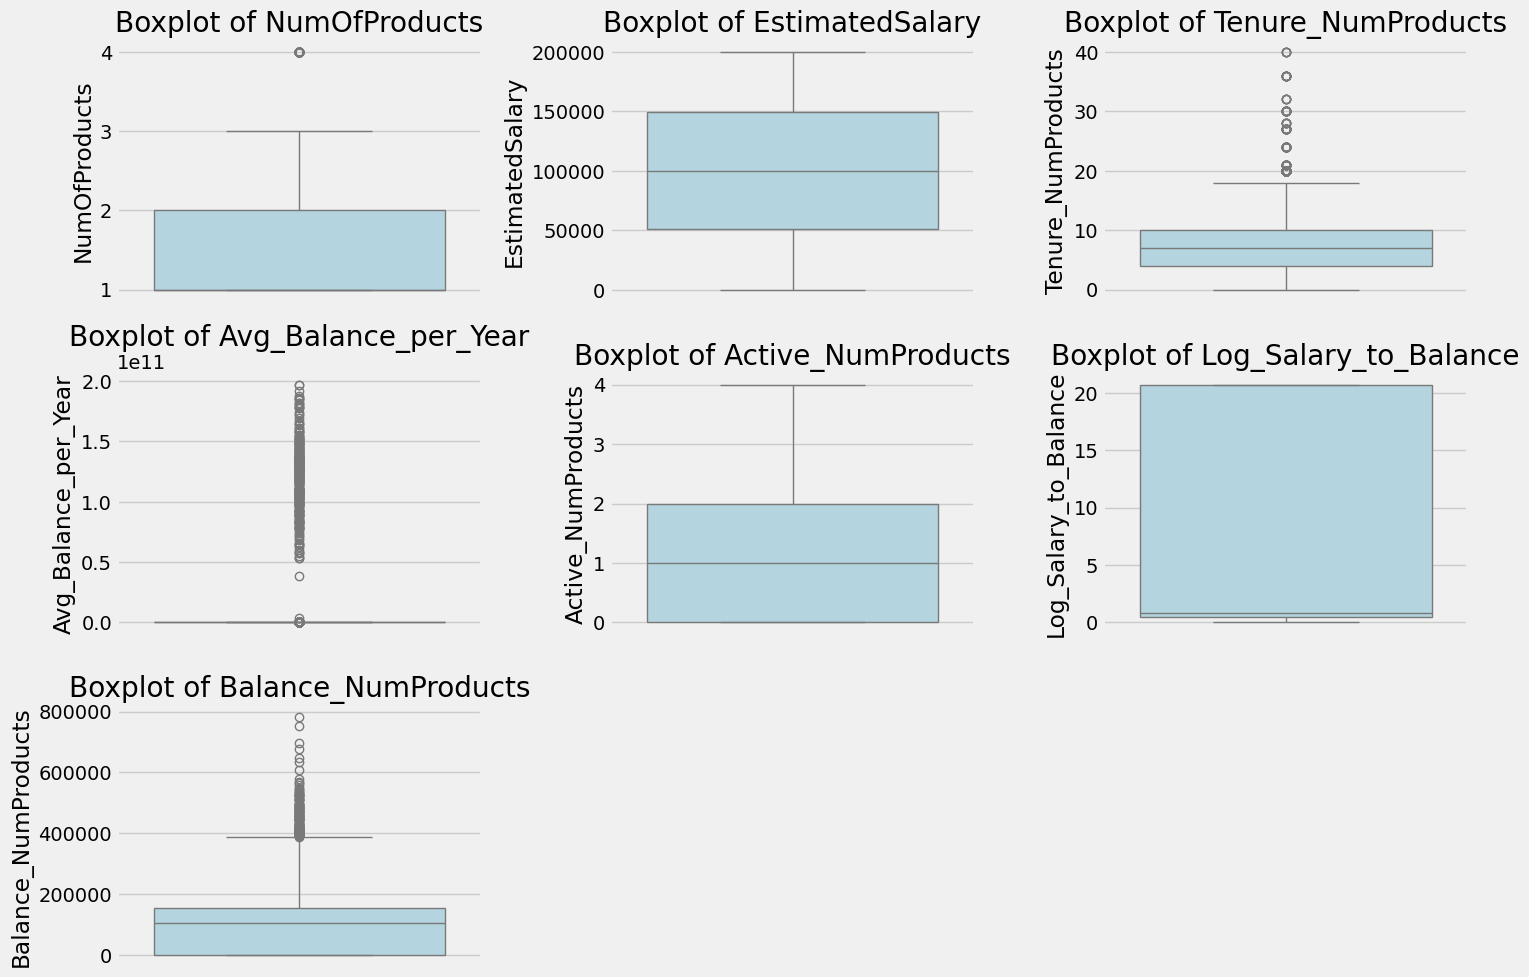


Outliers in NumOfProducts (IQR method): 60
Suggested clipping: [-0.50, 3.50]

Outliers in EstimatedSalary (IQR method): 0

Outliers in Tenure_NumProducts (IQR method): 354
Suggested clipping: [-5.00, 19.00]

Outliers in Avg_Balance_per_Year (IQR method): 1001
Suggested clipping: [-46447.17, 77411.95]

Outliers in Active_NumProducts (IQR method): 0

Outliers in Log_Salary_to_Balance (IQR method): 0

Outliers in Balance_NumProducts (IQR method): 114
Suggested clipping: [-232504.63, 387507.72]


In [615]:
# Define numerical features to check for outliers
numerical_cols = ['NumOfProducts', 'EstimatedSalary', 'Tenure_NumProducts', 
                 'Avg_Balance_per_Year', 'Active_NumProducts', 'Log_Salary_to_Balance', 
                 'Balance_NumProducts']

# 1. Summary statistics
print("\nSummary Statistics for Numerical Features:")
print(df[numerical_cols].describe())

# 2. Z-scores to flag outliers (|z| > 3)
z_scores = np.abs(zscore(df[numerical_cols].fillna(0)))  # Fillna for zeros in Avg_Balance_per_Year
outliers = (z_scores > 3).sum()
print("\nNumber of Outliers (|z| > 3) per Feature:")
print(pd.Series(outliers, index=numerical_cols))

# 3. Boxplots for visualization
plt.figure(figsize=(15, 10), dpi=100)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 4. Suggest clipping if outliers detected
for col in numerical_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"\nOutliers in {col} (IQR method): {outliers_count}")
    if outliers_count > 0:
        print(f"Suggested clipping: [{lower_bound:.2f}, {upper_bound:.2f}]")

In [616]:
df['Avg_Balance_per_Year'] = df['Avg_Balance_per_Year'].clip(upper=77411.95)
df['Balance_NumProducts'] = df['Balance_NumProducts'].clip(upper=387507.71)

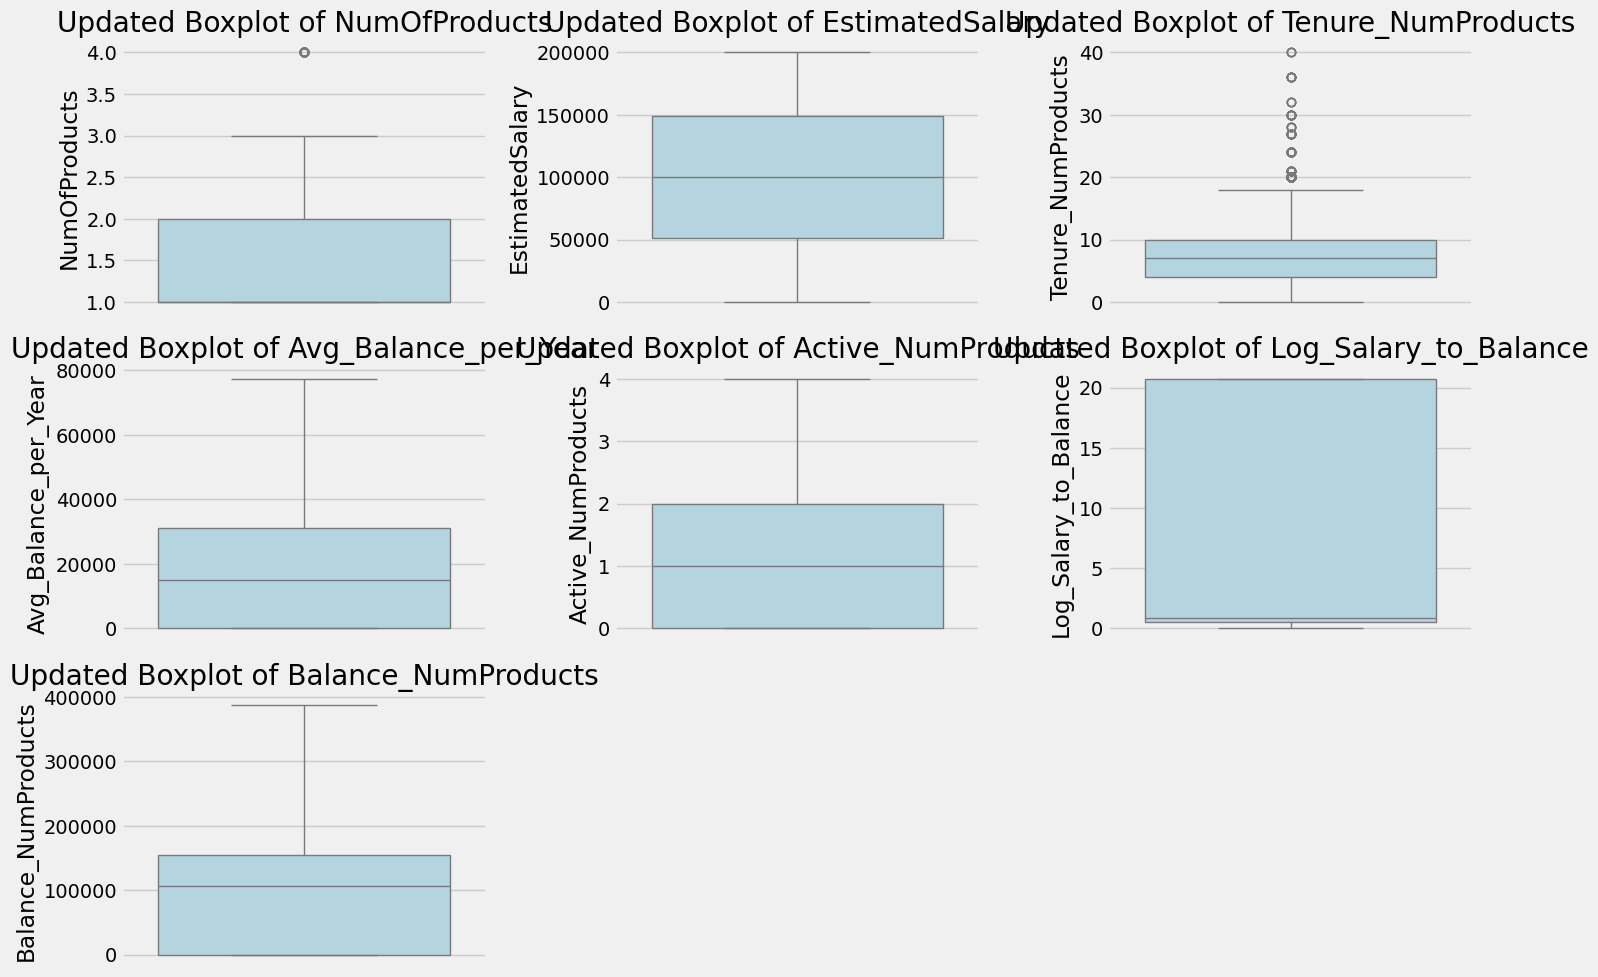

In [617]:
plt.figure(figsize=(15, 10), dpi=100)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Updated Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [618]:
for col in numerical_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"\nUpdated Outliers in {col} (IQR method): {outliers_count}")
    if outliers_count > 0:
        print(f"Remaining clipping bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")


Updated Outliers in NumOfProducts (IQR method): 60
Remaining clipping bounds: [-0.50, 3.50]

Updated Outliers in EstimatedSalary (IQR method): 0

Updated Outliers in Tenure_NumProducts (IQR method): 354
Remaining clipping bounds: [-5.00, 19.00]

Updated Outliers in Avg_Balance_per_Year (IQR method): 0

Updated Outliers in Active_NumProducts (IQR method): 0

Updated Outliers in Log_Salary_to_Balance (IQR method): 0

Updated Outliers in Balance_NumProducts (IQR method): 0


In [619]:
df.columns

Index(['Gender', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited',
       'Tenure_NumProducts', 'Avg_Balance_per_Year', 'Active_NumProducts',
       'Geo_Germany', 'Geo_Spain', 'Log_Salary_to_Balance', 'Age_Binned',
       'CreditScore_Binned', 'Balance_NumProducts'],
      dtype='object')

In [620]:
df.sample(10).T

,3787,2325,8520,277,7627,5225,8383,6707,3331,4835
Gender,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
NumOfProducts,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
HasCrCard,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
EstimatedSalary,186523.720000,148256.430000,176913.420000,189992.970000,182650.150000,74580.800000,56092.510000,104721.500000,165562.840000,29217.370000
Exited,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Tenure_NumProducts,4.000000,20.000000,2.000000,20.000000,3.000000,14.000000,10.000000,8.000000,5.000000,8.000000
Avg_Balance_per_Year,33774.004056,11554.531845,0.000000,0.000000,0.000000,0.000000,29733.556053,13137.914608,25855.680829,21285.442179
Active_NumProducts,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000
Geo_Germany,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Geo_Spain,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000


# Data Preparation

In [621]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Display feature names
print("\nFeatures after engineering:")
print(X.columns.tolist())

# Display shape of features and target
print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")


Features after engineering:
['Gender', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Tenure_NumProducts', 'Avg_Balance_per_Year', 'Active_NumProducts', 'Geo_Germany', 'Geo_Spain', 'Log_Salary_to_Balance', 'Age_Binned', 'CreditScore_Binned', 'Balance_NumProducts']

Shape of features (X): (10000, 13)
Shape of target (y): (10000,)


In [622]:
# Split data: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)
# Note: 0.1765 = 15/(85) to get 15% of original data as validation

In [623]:
# Function to scale features
def scale_features(X_train, X_valid, X_test):
    scaler = StandardScaler()
    # Fit scaler on training data only
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform validation and test data
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_valid_scaled, X_test_scaled, scaler

In [624]:
# Function to apply SMOTETomek
def apply_smotetomek(X_train, y_train):
    smotetomek = SMOTETomek(random_state=42)
    X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)
    return X_train_smotetomek, y_train_smotetomek

In [625]:
# Scale features
X_train_scaled, X_valid_scaled, X_test_scaled, scaler = scale_features(X_train, X_valid, X_test)

In [628]:
# Apply Smotetomek to training data
X_train_smotet, y_train_smotet = apply_smotetomek(X_train_scaled, y_train)

In [629]:
# Convert target to categorical for ANN (2 classes)
y_train_smotet_cat = to_categorical(y_train_smotet)
y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)

In [630]:
# Display shapes
print("Data Shapes:")
print(f"Training set (after SMOTETomek): X={X_train_smotet.shape}, y={y_train_smotet_cat.shape}")
print(f"Validation set: X={X_valid_scaled.shape}, y={y_valid_cat.shape}")
print(f"Test set: X={X_test_scaled.shape}, y={y_test_cat.shape}")

# Check class distribution after SMOTE
print("\nClass Distribution in Training Set (after SMOTE):")
print(pd.Series(y_train_smotet).value_counts(normalize=True) * 100)

# Check class distribution in validation and test sets
print("\nClass Distribution in Validation Set:")
print(pd.Series(y_valid).value_counts(normalize=True) * 100)
print("\nClass Distribution in Test Set:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)

Data Shapes:
Training set (after SMOTETomek): X=(10872, 13), y=(10872, 2)
Validation set: X=(1501, 13), y=(1501, 2)
Test set: X=(1500, 13), y=(1500, 2)

Class Distribution in Training Set (after SMOTE):
Exited
0    50.0
1    50.0
Name: proportion, dtype: float64

Class Distribution in Validation Set:
Exited
0    79.613591
1    20.386409
Name: proportion, dtype: float64

Class Distribution in Test Set:
Exited
0    79.6
1    20.4
Name: proportion, dtype: float64


# Model Building and Evaluation

In [631]:
# Function to evaluate and plot results
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    # Convert one-hot encoded y_true to class labels
    y_true_labels = np.argmax(y_true, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true_labels, y_pred)
    precision = precision_score(y_true_labels, y_pred)
    recall = recall_score(y_true_labels, y_pred)
    f1 = f1_score(y_true_labels, y_pred)
    roc_auc = roc_auc_score(y_true_labels, y_pred_proba[:, 1])
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred)
    plt.figure(figsize=(6, 4), dpi=100)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_true_labels, y_pred_proba[:, 1])
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Logistic Regression


Logistic Regression Performance:
Accuracy: 0.6995
Precision: 0.3650
Recall: 0.6405
F1-Score: 0.4650
ROC-AUC: 0.7446


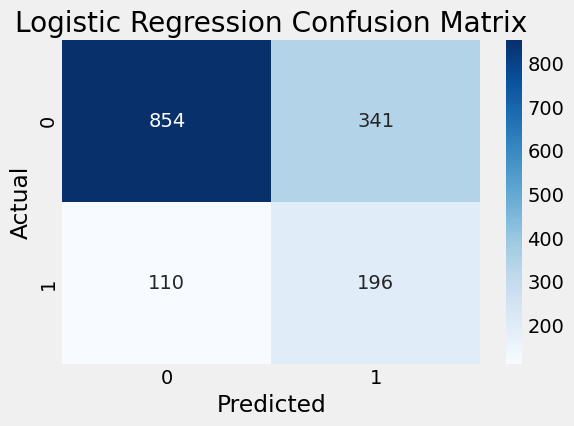

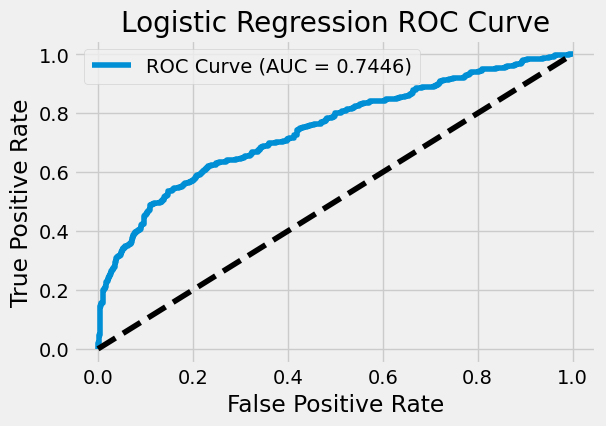

In [632]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smotet, y_train_smotet)
lr_pred = lr.predict(X_valid_scaled)
lr_pred_proba = lr.predict_proba(X_valid_scaled)
evaluate_model(y_valid_cat, lr_pred, lr_pred_proba, "Logistic Regression")

# XGBoost


XGBoost Performance:
Accuracy: 0.8454
Precision: 0.6504
Recall: 0.5229
F1-Score: 0.5797
ROC-AUC: 0.8278


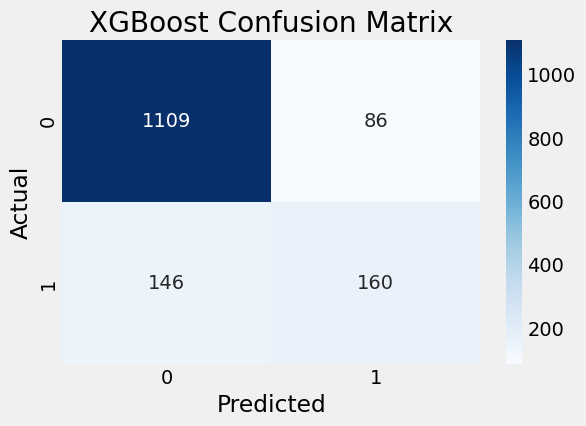

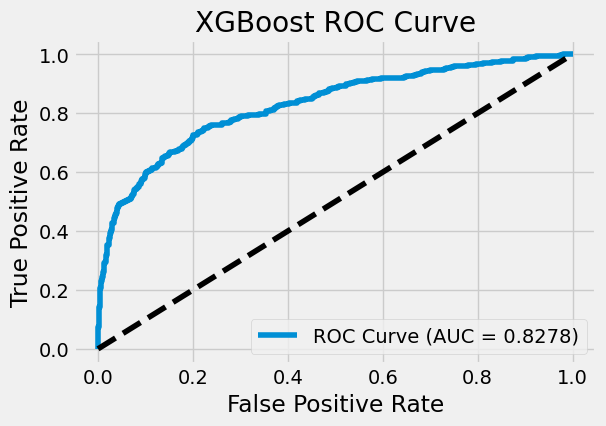

In [633]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_smotet, y_train_smotet)
xgb_pred = xgb.predict(X_valid_scaled)
xgb_pred_proba = xgb.predict_proba(X_valid_scaled)
evaluate_model(y_valid_cat, xgb_pred, xgb_pred_proba, "XGBoost")

In [640]:
# 4. XGBoost with Grid Search (GPU-Enabled)

# Start timer
start_time = time.time()

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    tree_method='hist',  # GPU-accelerated histogram method
    device='cuda',       # Use GPU (CUDA)
    scale_pos_weight=1   # Fixed at 1, as SMOTETomek is used
)
grid_search = GridSearchCV(
    xgb,
    param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=1  # Set to 1, as GPU handles parallelism
)
grid_search.fit(X_train_smotet, y_train_smotet)
print("\nBest XGBoost Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits

Best XGBoost Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}



XGBoost (SMOTETomek, scale_pos_weight=1, GPU) Performance:
Accuracy: 0.8474
Precision: 0.6498
Recall: 0.5458
F1-Score: 0.5933
ROC-AUC: 0.8227


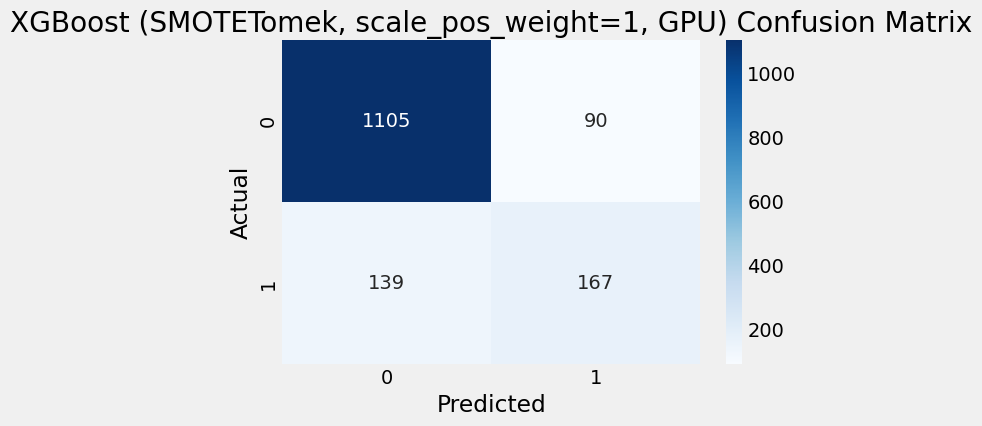

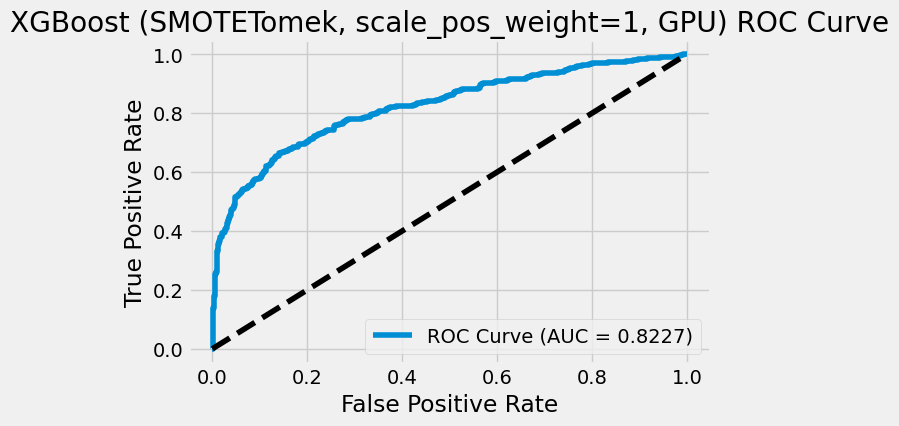

In [645]:

# Train Final XGBoost with Early Stopping (SMOTETomek, scale_pos_weight=1)
params = {
    **grid_search.best_params_,
    'random_state': 42,
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'device': 'cuda',
    'scale_pos_weight': 1
}
dtrain = DMatrix(X_train_smotet, label=y_train_smotet)
dvalid = DMatrix(X_valid_scaled, label=np.argmax(y_valid_cat, axis=1))

xgb_best = train(
    params,
    dtrain,
    num_boost_round=params['n_estimators'],
    evals=[(dvalid, 'valid')],
    early_stopping_rounds=20,
    verbose_eval=False
)
xgb_pred_proba = xgb_best.predict(dvalid)
xgb_pred = (xgb_pred_proba >= 0.5).astype(int)
evaluate_model(y_valid_cat, xgb_pred, np.vstack([1-xgb_pred_proba, xgb_pred_proba]).T, "XGBoost (SMOTETomek, scale_pos_weight=1, GPU)")

In [654]:
# Threshold Tuning (SMOTETomek, scale_pos_weight=1)
print("\nTuning Decision Threshold for Recall (SMOTETomek, scale_pos_weight=1)...")
thresholds = np.arange(0.2, 0.6, 0.05)
best_threshold = 0.5
best_recall = recall_score(np.argmax(y_valid_cat, axis=1), xgb_pred)
best_f1 = f1_score(np.argmax(y_valid_cat, axis=1), xgb_pred)
for t in thresholds:
    pred_t = (xgb_pred_proba >= t).astype(int)
    recall_t = recall_score(np.argmax(y_valid_cat, axis=1), pred_t)
    f1_t = f1_score(np.argmax(y_valid_cat, axis=1), pred_t)
    print(f"Threshold {t:.2f}, Recall: {recall_t:.4f}, F1: {f1_t:.4f}")
    if recall_t > best_recall and f1_t >= 0.60:
        best_recall = recall_t
        best_threshold = t
        best_f1 = f1_t
if best_threshold != 0.5:
    base_pred_threshold = (base_pred_proba >= best_threshold).astype(int)
    evaluate_model(y_valid_cat, base_pred_threshold, np.vstack([1-base_pred_proba, base_pred_proba]).T, f"XGBoost (SMOTETomek, Threshold={best_threshold:.2f}, GPU)")


Tuning Decision Threshold for Recall (SMOTETomek, scale_pos_weight=1)...
Threshold 0.20, Recall: 0.7810, F1: 0.5213
Threshold 0.25, Recall: 0.7418, F1: 0.5503
Threshold 0.30, Recall: 0.6961, F1: 0.5703
Threshold 0.35, Recall: 0.6699, F1: 0.5916
Threshold 0.40, Recall: 0.6307, F1: 0.5966
Threshold 0.45, Recall: 0.5752, F1: 0.5876
Threshold 0.50, Recall: 0.5458, F1: 0.5933
Threshold 0.55, Recall: 0.5229, F1: 0.6004



XGBoost (SMOTETomek, scale_pos_weight=1, GPU) Performance:
Accuracy: 0.8115
Precision: 0.5297
Recall: 0.6699
F1-Score: 0.5916
ROC-AUC: 0.8227


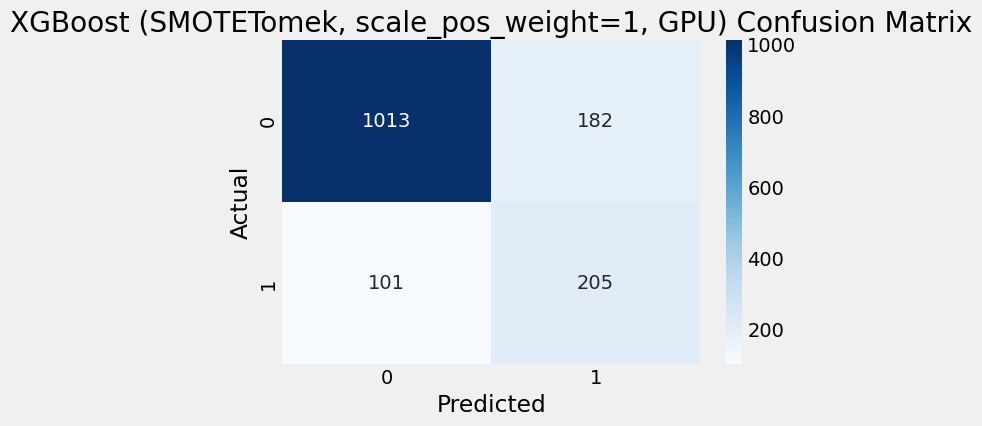

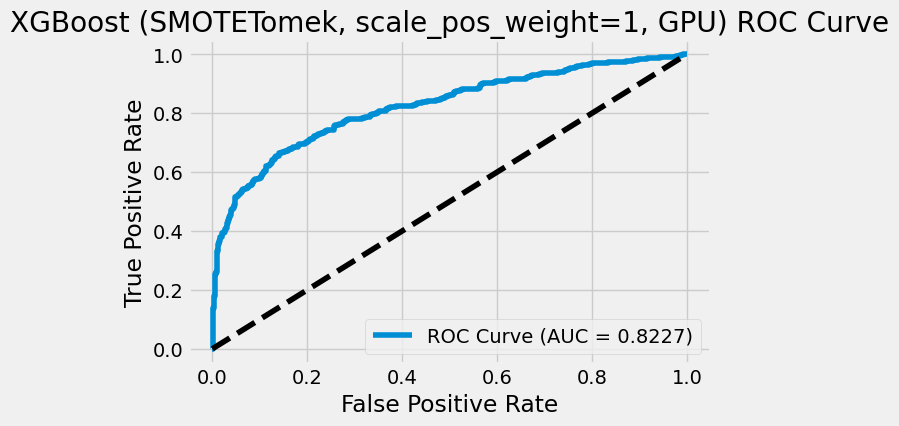

In [655]:
xgb_pred = (xgb_pred_proba >= 0.35).astype(int)
evaluate_model(y_valid_cat, xgb_pred, np.vstack([1-xgb_pred_proba, xgb_pred_proba]).T, "XGBoost (SMOTETomek, scale_pos_weight=1, GPU)")


XGBoost Feature Importance (Gain):
                  Feature  Importance
10             Age_Binned    0.269986
1           NumOfProducts    0.184819
6      Active_NumProducts    0.144409
7             Geo_Germany    0.073605
11     CreditScore_Binned    0.057873
4      Tenure_NumProducts    0.042996
12    Balance_NumProducts    0.042741
0                  Gender    0.038506
9   Log_Salary_to_Balance    0.035019
5    Avg_Balance_per_Year    0.030119
2               HasCrCard    0.029012
8               Geo_Spain    0.028502
3         EstimatedSalary    0.022413


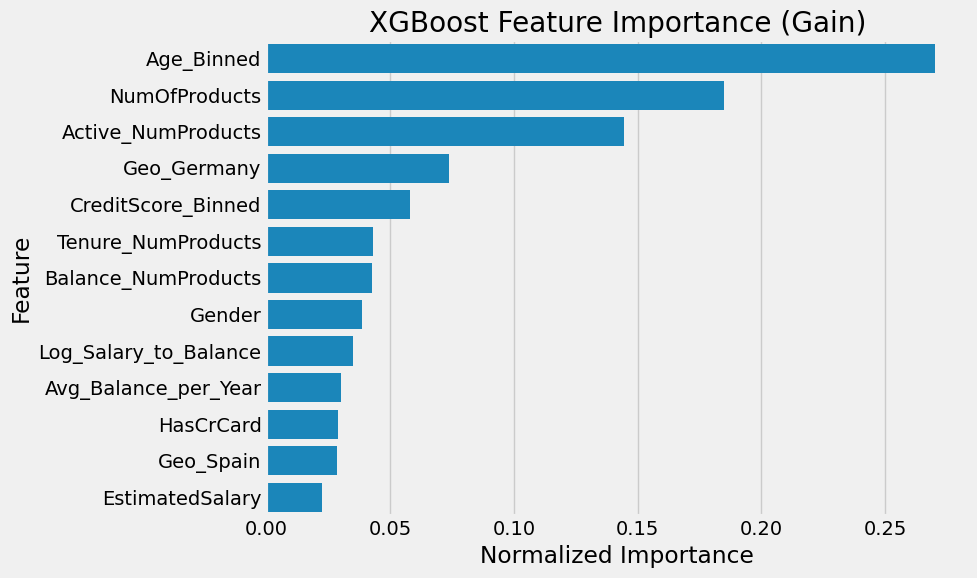

In [657]:
# Extract feature importance from Booster object
importance_dict = xgb_best.get_score(importance_type='gain')  # Use 'gain' for predictive power

# Map feature indices (f0, f1, etc.) to feature names
feature_map = {f'f{i}': col for i, col in enumerate(X_train.columns)}
importance = {feature_map.get(k, k): v for k, v in importance_dict.items()}

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values('Importance', ascending=False)

# Normalize importance (optional, for visualization)
feature_importance['Importance'] = feature_importance['Importance'] / feature_importance['Importance'].sum()

print("\nXGBoost Feature Importance (Gain):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('XGBoost Feature Importance (Gain)')
plt.xlabel('Normalized Importance')
plt.tight_layout()
plt.show()

# ANN

In [658]:
# Verify GPU availability
print("TensorFlow Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))
if not tf.config.list_physical_devices('GPU'):
    print("WARNING: No GPU detected. Training will be slow on CPU.")

# Start timer
start_time = time.time()

TensorFlow Version: 2.19.0
Available GPUs: []


In [663]:
# Reduce Features Based on XGBoost Importance
keep_features = [
    'Age_Binned', 'NumOfProducts', 'Active_NumProducts', 'Geo_Germany',
    'CreditScore_Binned', 'Tenure_NumProducts', 'Balance_NumProducts',
    'Gender', 'Log_Salary_to_Balance'
]
feature_indices = [X_train.columns.get_loc(f) for f in keep_features]
X_train_smotet_reduced = X_train_smotet[:, feature_indices]
X_valid_scaled_reduced = X_valid_scaled[:, feature_indices]
X_test_scaled_reduced = X_test_scaled[:, feature_indices]

print("X_train_smotet_reduced shape:", X_train_smotet_reduced.shape)
print("X_valid_scaled_reduced shape:", X_valid_scaled_reduced.shape)
print("X_test_scaled_reduced shape:", X_test_scaled_reduced.shape)
print("Features retained:", keep_features)

X_train_smotet_reduced shape: (10872, 9)
X_valid_scaled_reduced shape: (1501, 9)
X_test_scaled_reduced shape: (1500, 9)
Features retained: ['Age_Binned', 'NumOfProducts', 'Active_NumProducts', 'Geo_Germany', 'CreditScore_Binned', 'Tenure_NumProducts', 'Balance_NumProducts', 'Gender', 'Log_Salary_to_Balance']


In [664]:
# Preprocess Labels
print("Original y_train_smotet shape:", y_train_smotet.shape)
print("Original y_valid_cat shape:", y_valid_cat.shape)
print("Original y_test_cat shape:", y_test_cat.shape)

# Convert to one-hot encoded if not already
if len(y_train_smotet.shape) == 1 or y_train_smotet.shape[1] == 1:
    y_train_smotet = to_categorical(y_train_smotet, num_classes=2)
if len(y_valid_cat.shape) == 1 or y_valid_cat.shape[1] == 1:
    y_valid_cat = to_categorical(y_valid_cat, num_classes=2)
if len(y_test_cat.shape) == 1 or y_test_cat.shape[1] == 1:
    y_test_cat = to_categorical(y_test_cat, num_classes=2)

print("One-hot y_train_smotet shape:", y_train_smotet.shape)
print("One-hot y_valid_cat shape:", y_valid_cat.shape)
print("One-hot y_test_cat shape:", y_test_cat.shape)

Original y_train_smotet shape: (10872,)
Original y_valid_cat shape: (1501, 2)
Original y_test_cat shape: (1500, 2)
One-hot y_train_smotet shape: (10872, 2)
One-hot y_valid_cat shape: (1501, 2)
One-hot y_test_cat shape: (1500, 2)


Epoch 1/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6623 - loss: 1.0438 - val_accuracy: 0.7328 - val_loss: 0.7035
Epoch 2/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7366 - loss: 0.6549 - val_accuracy: 0.7475 - val_loss: 0.5761
Epoch 3/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7596 - loss: 0.5561 - val_accuracy: 0.7628 - val_loss: 0.5426
Epoch 4/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7682 - loss: 0.5221 - val_accuracy: 0.7875 - val_loss: 0.4906
Epoch 5/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7639 - loss: 0.5215 - val_accuracy: 0.7675 - val_loss: 0.5356
Epoch 6/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7724 - loss: 0.5139 - val_accuracy: 0.7828 - val_loss: 0.4961
Epoch 7/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7686 - loss: 0.5075 - val_accuracy: 0.7555 - val_loss: 0.5372
Epoch 8/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7673 - loss: 0.5037 - val_accu

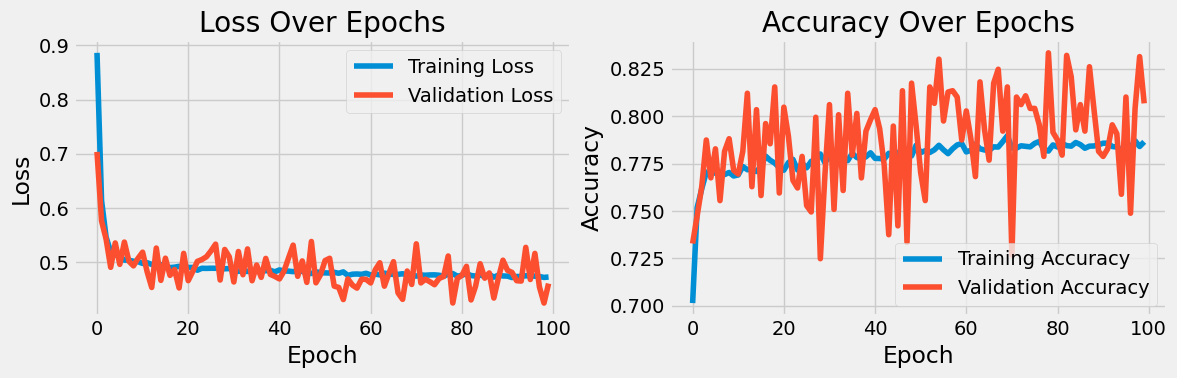

In [665]:
# Build and Train ANN
ann = Sequential([
    Dense(64, activation='relu', input_shape=(len(keep_features),), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = ann.fit(
    X_train_smotet_reduced, y_train_smotet,
    epochs=100,
    batch_size=32,
    validation_data=(X_valid_scaled_reduced, y_valid_cat),
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


ANN (Default Threshold=0.5, GPU) Performance:
Accuracy: 0.8068
Precision: 0.5189
Recall: 0.7190
F1-Score: 0.6027
ROC-AUC: 0.8436


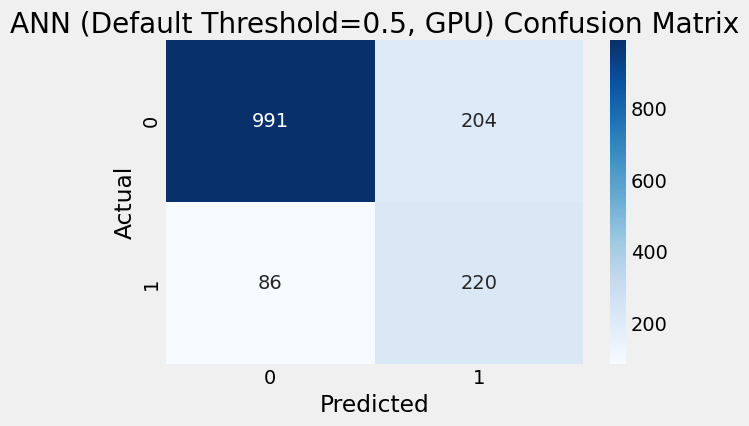

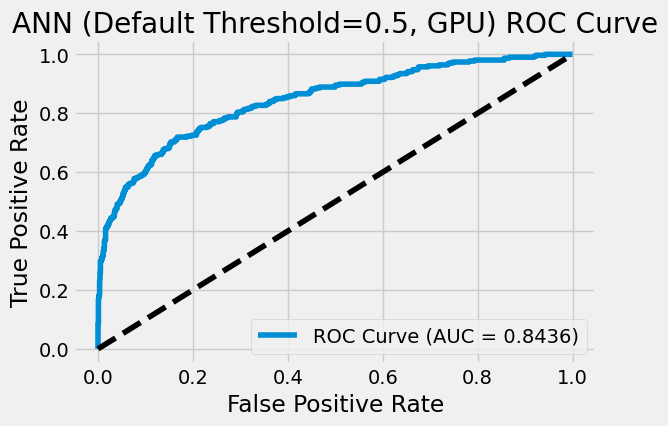

In [667]:
# Evaluate ANN 
ann_pred_proba = ann.predict(X_valid_scaled_reduced, verbose=0)[:, 1]
ann_pred = (ann_pred_proba >= 0.5).astype(int)

# Evaluate default threshold (0.5)
evaluate_model(y_valid_cat, ann_pred, np.vstack([1-ann_pred_proba, ann_pred_proba]).T, "ANN (Default Threshold=0.5, GPU)")

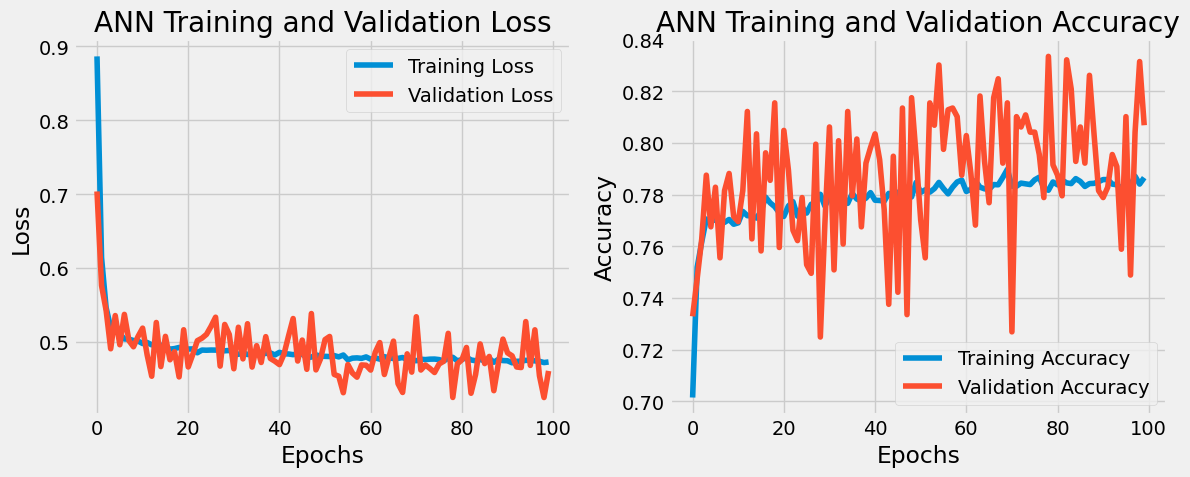

In [668]:
# Plot training history
plt.figure(figsize=(12, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [669]:
# Threshold tuning
print("\nTuning Decision Threshold for Recall...")
thresholds = np.arange(0.2, 0.6, 0.05)
best_threshold = 0.5
best_recall = recall_score(np.argmax(y_valid_cat, axis=1), ann_pred)
best_precision = precision_score(np.argmax(y_valid_cat, axis=1), ann_pred)
best_f1 = f1_score(np.argmax(y_valid_cat, axis=1), ann_pred)
for t in thresholds:
    pred_t = (ann_pred_proba >= t).astype(int)
    recall = recall_score(np.argmax(y_valid_cat, axis=1), pred_t)
    precision = precision_score(np.argmax(y_valid_cat, axis=1), pred_t)
    f1 = f1_score(np.argmax(y_valid_cat, axis=1), pred_t)
    print(f"Threshold {t:.2f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}")
    if recall > best_recall and precision > 0.50 and f1 >= 0.60:
        best_recall, best_precision, best_f1, best_threshold = recall, precision, f1, t

# Evaluate best threshold
if best_threshold != 0.5:
    ann_pred_best = (ann_pred_proba >= best_threshold).astype(int)
    evaluate_model(y_valid_cat, ann_pred_best, np.vstack([1-ann_pred_proba, ann_pred_proba]).T, f"ANN (Threshold={best_threshold:.2f}, GPU)")


Tuning Decision Threshold for Recall...
Threshold 0.20, Recall: 0.8987, Precision: 0.3107, F1: 0.4618
Threshold 0.25, Recall: 0.8660, Precision: 0.3406, F1: 0.4889
Threshold 0.30, Recall: 0.8399, Precision: 0.3682, F1: 0.5120
Threshold 0.35, Recall: 0.8105, Precision: 0.4019, F1: 0.5374
Threshold 0.40, Recall: 0.7680, Precision: 0.4468, F1: 0.5649
Threshold 0.45, Recall: 0.7386, Precision: 0.4748, F1: 0.5780
Threshold 0.50, Recall: 0.7190, Precision: 0.5189, F1: 0.6027
Threshold 0.55, Recall: 0.6667, Precision: 0.5543, F1: 0.6053



Evaluating Best ANN on Test Set...

ANN (Test Set, Threshold=0.50, GPU) Performance:
Accuracy: 0.7760
Precision: 0.4675
Recall: 0.7059
F1-Score: 0.5625
ROC-AUC: 0.8421


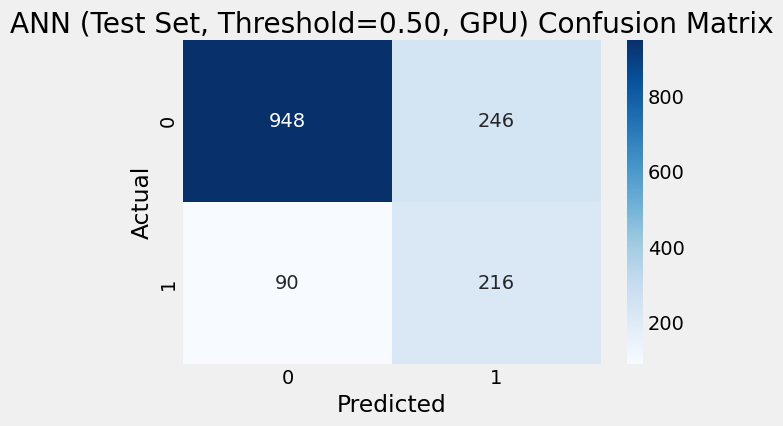

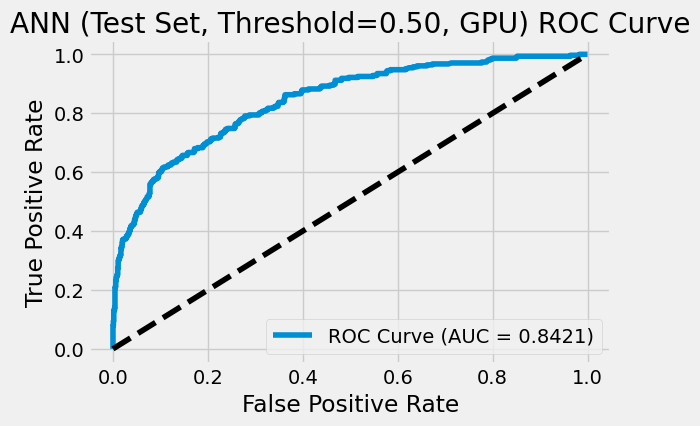

In [670]:
# Test Set Evaluation
print("\nEvaluating Best ANN on Test Set...")
test_pred_proba = ann.predict(X_test_scaled_reduced, verbose=0)[:, 1]
test_pred = (test_pred_proba >= best_threshold).astype(int)
evaluate_model(y_test_cat, test_pred, np.vstack([1-test_pred_proba, test_pred_proba]).T, f"ANN (Test Set, Threshold={best_threshold:.2f}, GPU)")